In [100]:
# importing libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [101]:
'''
name
year
selling_price
km_driven
fuel            -> diesel/petrol/lpg/cng/electric
seller_type     -> indiviudal/dealer
transmission    -> manual/auto
Owner           -> first/second
'''
car_sale_data = pd.read_csv('./data/car_data.csv')
TRAIN_RATIO = 0.8

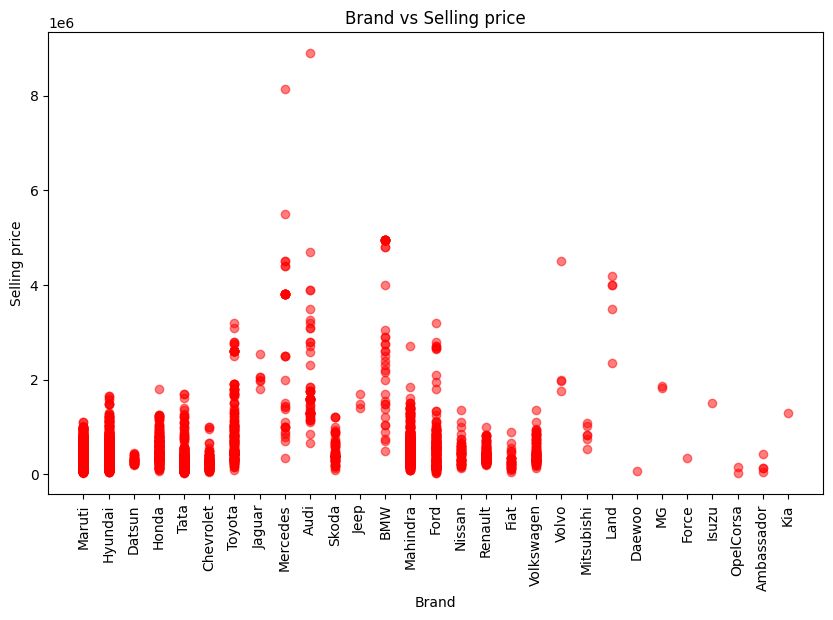

In [102]:
def get_brand(name):
  """Returns the car brand from the car name."""
  pattern = r'(\w+)'
  match = re.search(pattern, name)
  if match:
    return match.group(1)
  else:
    return None

car_sale_data["brand_name"] = car_sale_data["name"].apply(get_brand)
car_sale_data["brand_name"].value_counts()

plt.figure(figsize=(10, 6)) 
plt.scatter(car_sale_data['brand_name'], car_sale_data['selling_price'], c='red', alpha=0.5,)
plt.xlabel('Brand')
plt.ylabel('Selling price')
plt.title('Brand vs Selling price')
plt.xticks(rotation=90)
plt.show()

#### Mapping brand value


In [103]:


def get_brand(name):
  """Returns the car brand from the car name."""
  pattern = r'(\w+)'
  match = re.search(pattern, name)
  if match:
    return match.group(1)
  else:
    return None
  
## Acc to 2022 Indian market share, Statista
brand_values = {
    'Maruti' : 0.46,
    'Hyundai': 0.17,
    'Tata': 0.09,
    'Mahindra': 0.05,
    'Kia': 0.06,
    'Toyota': 0.04,
    'Honda': 0.03,
    'Renault': 0.03
}
brands = {get_brand(name) for name in car_sale_data['name'].unique()}
other_brands = np.setdiff1d(brands, list(brand_values.keys()))
other_brands_value = 0.07 / len(other_brands)

def get_brand_val(name):
    brand_name = get_brand(name)
    if brand_name in brand_values:
        return brand_values[brand_name]
    else:
        return other_brands_value

car_sale_data['brand'] = car_sale_data['name'].apply(get_brand_val)
car_sale_data.drop('name', axis=1, inplace=True)
car_sale_data.isna().sum()

# NOTE: dropping the brand value feature
car_sale_data.drop("brand", axis=1, inplace=True)
car_sale_data.drop("brand_name", axis=1, inplace=True)

car_sale_data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
4334,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4337,2016,865000,90000,Diesel,Individual,Manual,First Owner


#### Mapping owner number to integer


In [104]:
car_sale_data['owner'].value_counts()
def get_no_owners(info):
    nos = {
        'First Owner' : 1,
        'Second Owner': 2,
        'Third Owner': 3,
        'Fourth & Above Owner': 4,
        'Test Drive Car': 0
    }
    return nos[info]

car_sale_data['owner'] = car_sale_data['owner'].apply(get_no_owners)


#### Splitting data

In [105]:
X_df = car_sale_data.drop('selling_price', axis=1)
Y_df = car_sale_data['selling_price']

train_size = int(TRAIN_RATIO * len(car_sale_data))
X_train, Y_train = X_df[:train_size], Y_df[:train_size]
X_test, Y_test = X_df[train_size:], Y_df[train_size:]


In [106]:
X_train.isna().sum()
check_columns = ['fuel', 'transmission', 'seller_type', 'owner']
for col in check_columns:
    print(f'uniq values in {col} are {X_train[col].unique()}')

uniq values in fuel are ['Petrol' 'Diesel' 'CNG' 'LPG']
uniq values in transmission are ['Manual' 'Automatic']
uniq values in seller_type are ['Individual' 'Dealer' 'Trustmark Dealer']
uniq values in owner are [1 2 4 3 0]


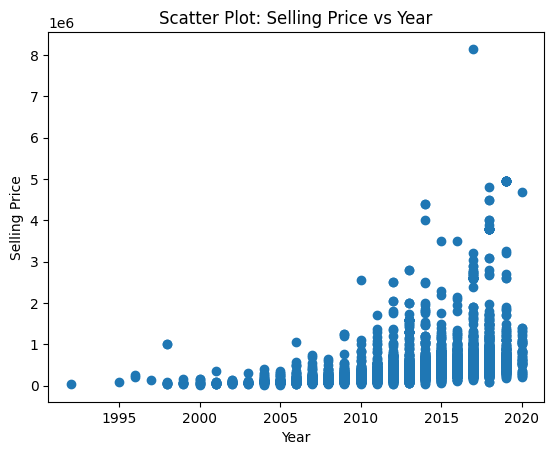

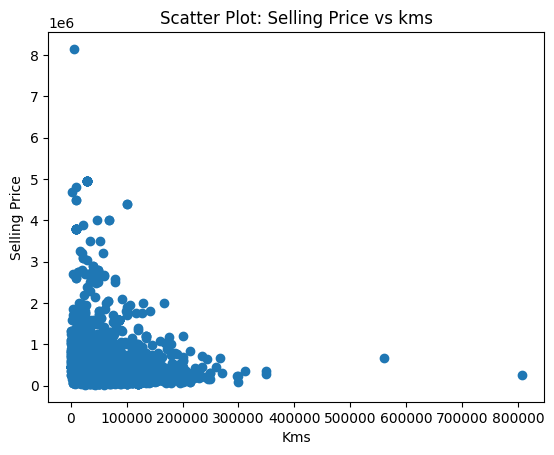

In [107]:
# checking whether year and km_driven have any linear relationship with selling price
plt.scatter(X_train['year'], Y_train)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Scatter Plot: Selling Price vs Year')
plt.show()

plt.scatter(X_train['km_driven'], Y_train)
plt.xlabel('Kms')
plt.ylabel('Selling Price')
plt.title('Scatter Plot: Selling Price vs kms')
plt.show()


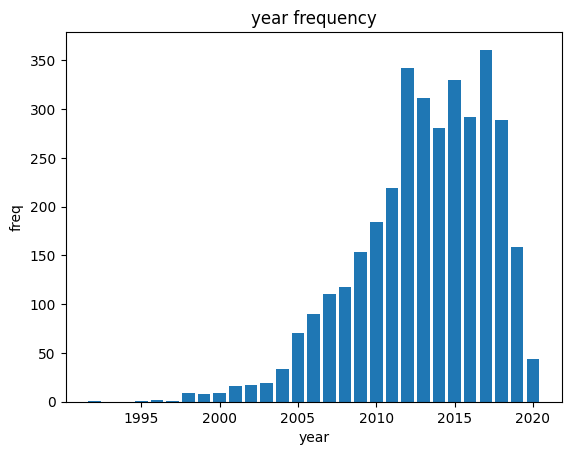

Text(0.5, 1.0, 'kms vs freq')

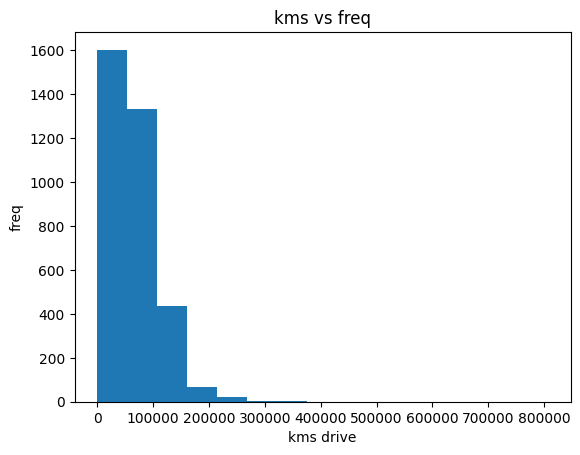

In [108]:
# visualising the distribution of various params

year_counts = X_train['year'].value_counts()
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('year')
plt.ylabel('freq')
plt.title("year frequency")
plt.show()

plt.hist(X_train['km_driven'], bins=15)
plt.xlabel('kms drive')
plt.ylabel('freq')
plt.title("kms vs freq")

from the above histograms, it can be inferred that
kms_drive more than 400k are scarce
similarly, year < 1995

In [109]:
possible_outliers = X_train.loc[(X_train['km_driven'] > 350000) | (X_train['year'] <= 1996)]
print(possible_outliers)

X_train['year'].value_counts()
X_train['km_driven'].value_counts()


X_train = X_train.drop(possible_outliers.index)
Y_train = Y_train.drop(possible_outliers.index)

print(X_train.shape, Y_train.shape)

# outliers removed

      year  km_driven    fuel seller_type transmission  owner
61    1996      35000  Diesel  Individual       Manual      2
525   2016     560000  Diesel      Dealer       Manual      1
631   1995     100000  Petrol  Individual       Manual      2
1243  2009     806599  Petrol      Dealer       Manual      1
2972  1996      60000  Diesel  Individual       Manual      1
3334  1992     100000  Petrol  Individual       Manual      4
(3465, 6) (3465,)


In [110]:

# Apply one-hot encoding to categorical columns
X_train_norm = X_train.copy()
X_train_norm = pd.get_dummies(X_train_norm, columns=['fuel', 'transmission', 'seller_type', 'owner'], dtype=int)

# Normalize km_driven column
kms = X_train_norm['km_driven']
X_train_norm['km_driven'] = (kms - kms.min()) / (kms.max() - kms.min())

# Normalize year column
yrs = X_train_norm['year']
X_train_norm['year'] = (yrs - yrs.min()) / (yrs.max() - yrs.min())

# Normalize Y values
Y_train_norm = Y_train.copy()
Y_train_norm = (Y_train - Y_train.min()) / (Y_train.max() - Y_train.min())


In [111]:

epochs = 1000
alpha = 0.02


def linear_regression(X_df: pd.DataFrame, Y_df: pd.DataFrame):
    J = np.zeros(epochs)
    X = X_df.values
    Y = Y_df.values

    X = np.hstack((np.ones((X_df.shape[0], 1)), X))  #added intercept b as feature

    theta = np.zeros(X.shape[1])
    m = X.shape[0]   # m -> no of training examples in std formula

    for i in range(epochs): 
        h = np.dot(X, theta)  #the hypothesis function
        j = (1 / (2 * m)) * np.sum((h - Y) ** 2)
        J[i] = j

        grad = (1/m) * np.dot(X.T, (h - Y))
        theta -= alpha * grad


    return theta, J, X


coeffs, J_history, x_vector = linear_regression(X_train_norm, Y_train_norm)

Y_train_pred = x_vector.dot(coeffs)

In [112]:
scale_factors = {
    'km_min' : X_train["km_driven"].min(),
    'km_max': X_train['km_driven'].max(),
    'year_min': X_train['year'].min(),
    'year_max': X_train['year'].max(),
    'y_min': Y_train.min(),
    'y_max': Y_train.max()
}

def predict(X_test: pd.DataFrame, coeffs: np.ndarray) -> np.ndarray:
    X_test_norm = pd.get_dummies(X_test, columns=['fuel', 'transmission', 'seller_type', 'owner'], dtype=int)
    
    # Normalize km_driven column
    X_test_norm['km_driven'] = (X_test_norm['km_driven'] - scale_factors['km_min']) / (scale_factors['km_max'] - scale_factors['km_min'])

    # Normalize year column
    X_test_norm['year'] = ( X_test_norm['year'] - scale_factors['year_min']) / (scale_factors['year_max'] - scale_factors['year_min'])
    
    X = X_test_norm.values
    X = np.hstack((np.ones((X_test_norm.shape[0], 1)), X))  #added intercept b as feature
    
    Y_pred = np.dot(X, coeffs)
    
    
    return Y_pred


Y_pred_norm = predict(X_test=X_test, coeffs=coeffs)
# Y_pred = Y_pred * (scale_factors['y_max'] - scale_factors['y_min']) + scale_factors['y_min']


Y_test_norm = (Y_test - scale_factors['y_min']) / (scale_factors['y_max'] - scale_factors['y_min'])


#### Trend in error J

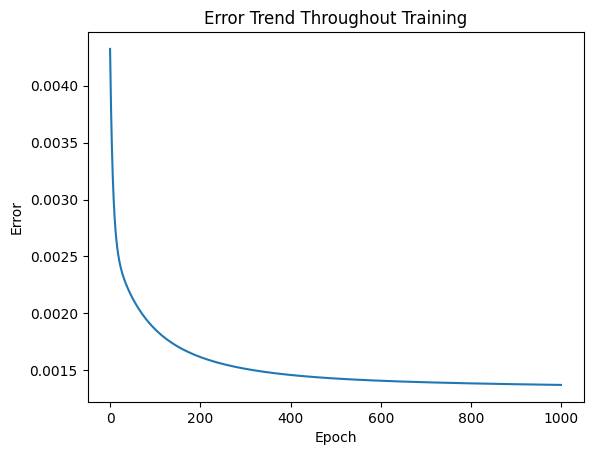

In [113]:
plt.plot(J_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error Trend Throughout Training')
plt.show()

#### Root mean square error and MSE

In [114]:
def evaluate_accuracy(Y_a: np.ndarray, Y_h: np.ndarray):  #y_h -> yHat, y_a -> yActual
    mse = np.mean((Y_a - Y_h) ** 2)
    rmse = np.sqrt(mse)
    return rmse, mse

rmse_test, mse_test = evaluate_accuracy(Y_test_norm, Y_pred_norm)
rmse_train, mse_train = evaluate_accuracy(Y_train_norm, Y_train_pred)

print(rmse_test, rmse_train)


0.055932192692575586 0.052363359635014116


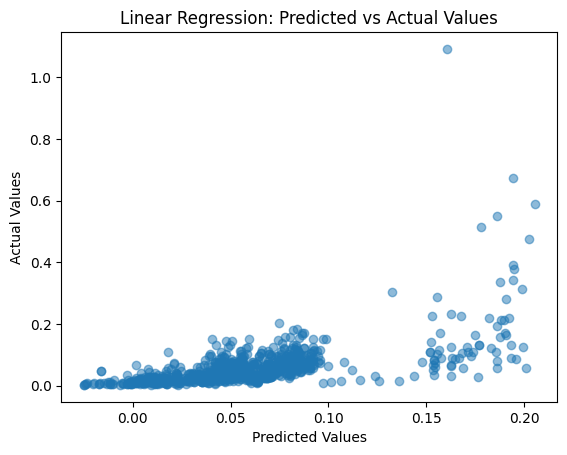

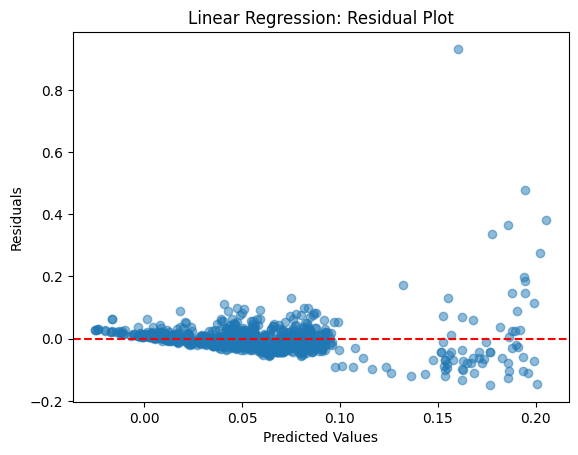

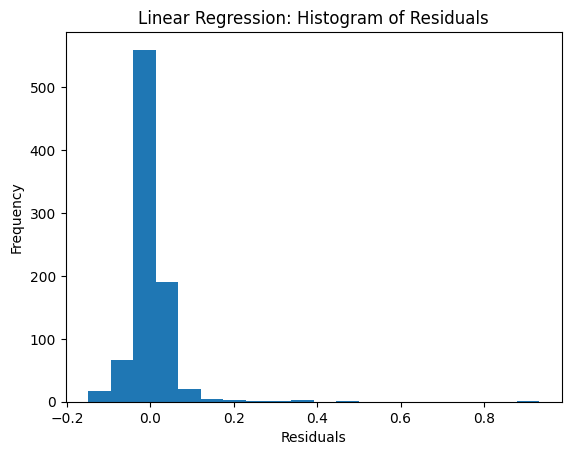

In [115]:
# Y_pred = Y_pred * (scale_factors['y_max'] - scale_factors['y_min']) + scale_factors['y_min']

plt.scatter(Y_pred_norm, Y_test_norm, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Linear Regression: Predicted vs Actual Values')
plt.show()

residuals = Y_test_norm - Y_pred_norm
plt.scatter(Y_pred_norm, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at y=0
plt.show()

plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Linear Regression: Histogram of Residuals')
plt.show()

#### Calculating adjusted R squared value

In [117]:
n = len(Y_test_norm)
p = len(coeffs) -1
ss_res = np.sum((Y_test_norm - Y_pred_norm) ** 2)  # sum squared residuals
ss_tot = np.sum((Y_test_norm - np.mean(Y_test_norm)) ** 2)  # total sum of squares
r2 = 1 - (ss_res / ss_tot)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

adj_r2


0.35408784226580037

#### Initial R squared value of 0.36 -- with number of owner mapped to integer and brand_value given on basis of market share.
##### Improvement scope: to use one-hot encoding for owners and using some other metric for car model/brand
- Update: used one-hot encoding for owner and dropped brand, rsq goes to 0.35